In [3]:
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA(n_components=50)

a = pickle.load( open( "single_ingredients_w2v.p", "rb" ) ) 
X=[]
labels= []
for elem in a:
    X.append(elem['word2vec'])
    labels.append(elem['ingredient'])
    
X_pca = pca.fit_transform(X)

model = PCA(n_components=2)
X_tsne = model.fit_transform(X_pca)

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


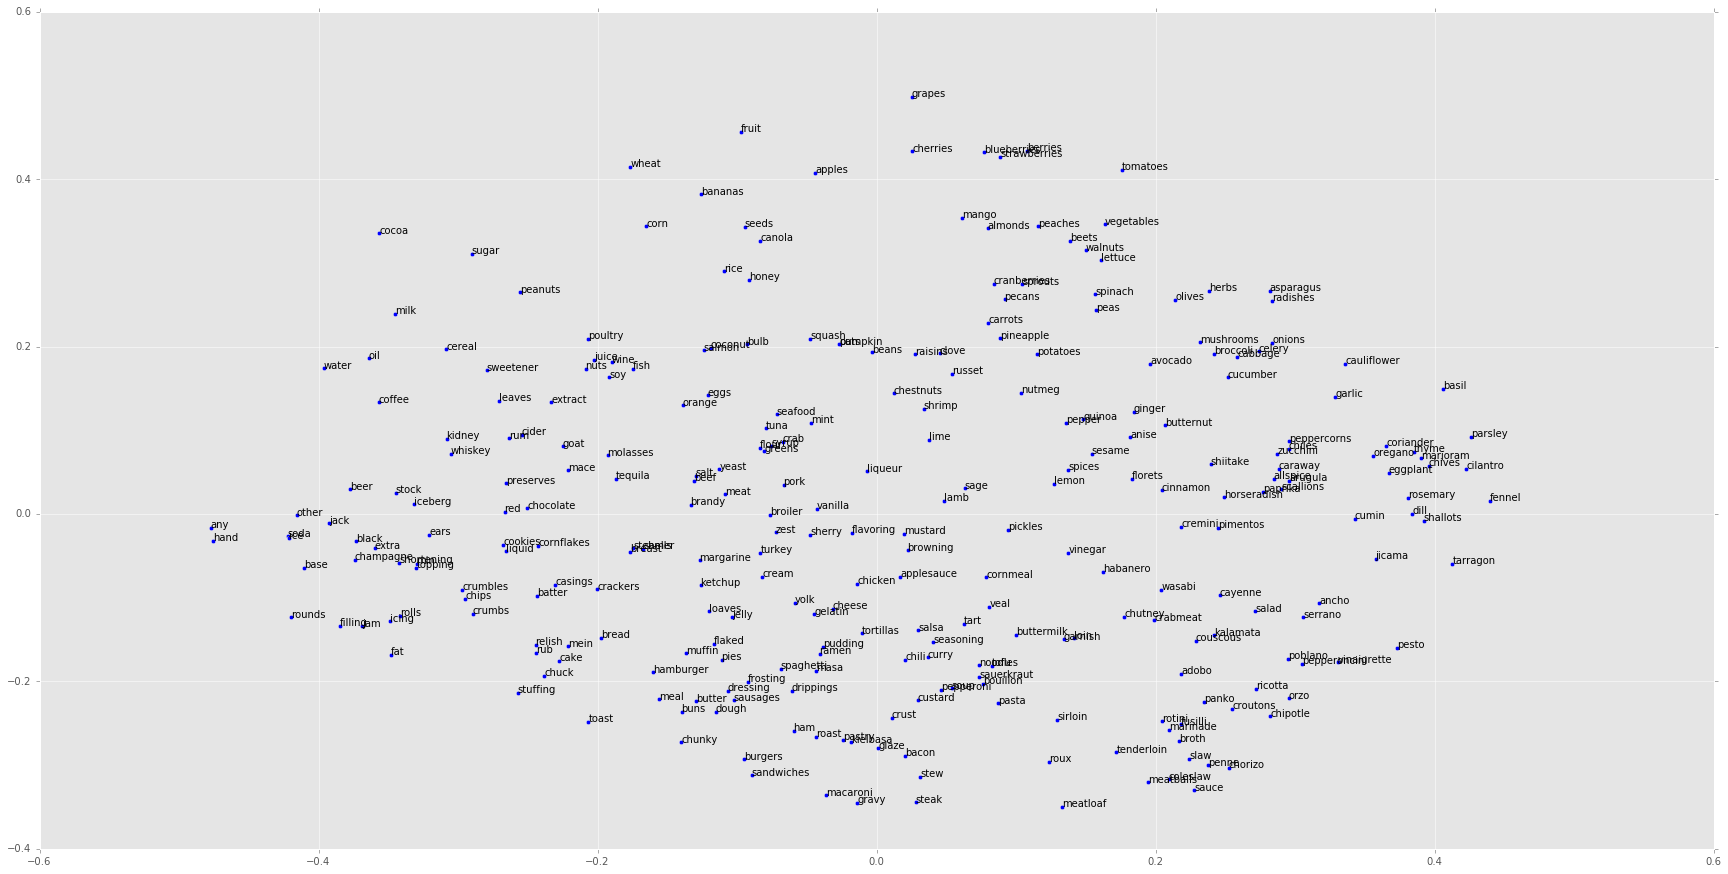

In [88]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(30,15))

ax.scatter(X_tsne[:,0],X_tsne[:,1])

for i, txt in enumerate(labels):
    ax.annotate(txt, (X_tsne[i,0],X_tsne[i,1]))



In [4]:
b = pickle.load( open( "recipe_word2vecs.p", "rb" ) ) 


In [91]:
X_b=[]
labels_b= []
for elem in b:
    X_b.append(elem['word2vec'])
    f = elem['ingredients']
    finalMap = {}
    for d in f:
        finalMap.update(d)
    labels_b.append("-".join([key.encode('ascii','ignore') for key in finalMap.keys()][:5]))

pca = PCA(n_components=50)    
X_b_pca = pca.fit_transform(X_b)

model_b = TSNE(n_components=2)
X_b_tsne = model_b.fit_transform(X_b_pca)


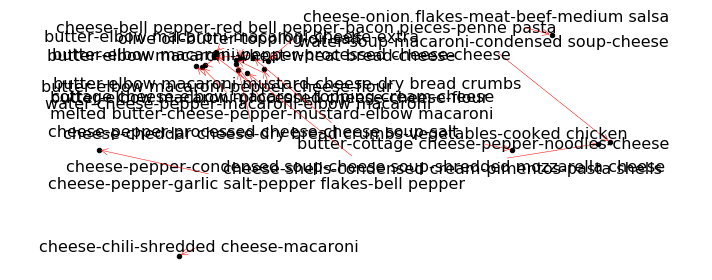

In [93]:
from __future__ import unicode_literals
from adjustText import adjust_text
from scipy import interpolate

import networkx as nx




fig, ax = plt.subplots(figsize=(10,4))
num_recipes = 20
xs= X_b_tsne[:num_recipes,0]
ys= X_b_tsne[:num_recipes,1]


ax.scatter(X_b_tsne[:num_recipes,0],X_b_tsne[:num_recipes,1], alpha=1, color='k') #marker='x', s=1, 

ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
fig.patch.set_facecolor('white')
fig.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.xlim(11.6,12.1)
plt.ylim(-4,2)

txt_height = 0.0037*(plt.ylim()[1] - plt.ylim()[0])
txt_width = 0.018*(plt.xlim()[1] - plt.xlim()[0])


# texts=[]

# for x, y, txt in zip(xs, ys, labels_b[:num_recipes]):
#      texts.append(plt.text(str(txt[:4]),x,y))


texts=[]
for xt, yt, s in zip(xs, ys, labels_b):
        texts.append(plt.text(xt, yt, s, fontsize=16))
        



adjust_text(texts,  arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
            autoalign='y', only_move={'points':'y', 'text':'y'})

# text_positions = get_text_positions(texts, xs, ys, txt_width, txt_height)

# text_plotter(texts, xs, ys, text_positions, txt_width, txt_height)

fig.savefig('recipe_zoom.eps', format='eps', bbox_inches='tight')
plt.show()

